In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Display basic dataset info
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  

In [4]:
# Handle missing values
# Convert 'TotalCharges' to numeric (some values might be empty strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [5]:
# Fill missing values for numeric columns only
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

In [6]:
# Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [9]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]


In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.96      0.87      1036
        True       0.72      0.32      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.64      0.65      1409
weighted avg       0.78      0.79      0.75      1409



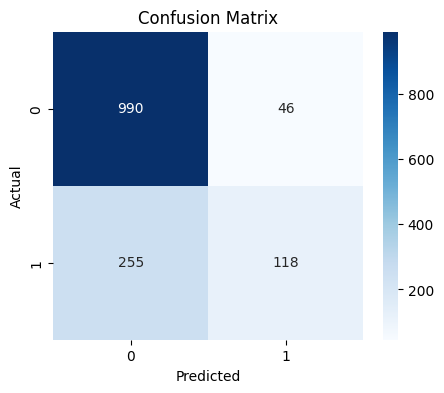

In [15]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

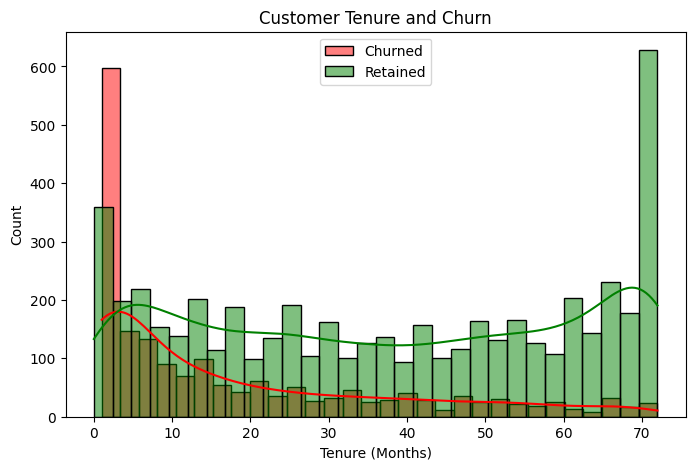

In [17]:
# Visualizing customer churn impact on tenure
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Churn_Yes'] == 1]['tenure'], bins=30, color='red', label='Churned', kde=True)
sns.histplot(df[df['Churn_Yes'] == 0]['tenure'], bins=30, color='green', label='Retained', kde=True)
plt.legend()
plt.title("Customer Tenure and Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()
